In [98]:
from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

def load_votes():
    votes = np.genfromtxt('data_lab2/votes.dat',delimiter=',')
    data = votes.reshape((349,31))
    return data

def load_attr():
    data = np.zeros((349,3))
    sex = np.genfromtxt('data_lab2/mpsex.dat',delimiter='\n')
    party = np.genfromtxt('data_lab2/mpparty.dat',delimiter='\n')
    district = np.genfromtxt('data_lab2/mpdistrict.dat',delimiter='\n')
    
    sex = sex[~np.isnan(sex)]
    party = party[~np.isnan(party)]
    district = district[~np.isnan(district)]
    
    sex = sex.reshape((349,))
    party = party.reshape((349,))
    district = district.reshape((349,))
    
    with open('data_lab2/mpnames.txt') as f:
        string = f.read()
        names = string.split('\n')
    
    data[:,0] = sex
    data[:,1] = party
    data[:,2] = district
    return data,names[0:-1]

In [155]:
def norm_3d(arr):
    #Assumes arr has 3d and it performs l2 norm along axis=2 (along third dimension)
    
    output = np.zeros((arr.shape[0],arr.shape[1]))
    for n in range(arr.shape[0]):
        for m in range(arr.shape[1]):
            tmp = np.linalg.norm(arr[n,m,:])
            output[n,m] = tmp
    return output

In [296]:
patterns = load_votes()
attr,names = load_attr()

w = np.random.rand(patterns.shape[0], patterns.shape[1])
w = np.random.rand(10,10,patterns.shape[1])

epochs = 100
eta  = 1e-2

flag = False
neighbourhood_size = 4
nResize_step = [10,40]


In [297]:
for i in range(epochs):
    if i > nResize_step[0]:
        neighbourhood_size = int(neighbourhood_size/2)
    elif i > nResize_step[1]:
        neighbourhood_size = int(neighbourhood_size/4)
    else:
        pass
    
    for j,vote in enumerate(patterns):
        dist = vote - w
        dist_norm = norm_3d(dist)

        min_ind = np.argwhere(dist_norm == dist_norm.min())        
        min_ind = min_ind.flatten()
        min_dist = dist_norm[min_ind[0],min_ind[1]]

        for n in range(-neighbourhood_size,neighbourhood_size):
            if n==0 or (min_ind[0]+n) >= w.shape[0]:
                continue
            for m in range(-neighbourhood_size,neighbourhood_size):
                if m==0 or (min_ind[1]+m) >= w.shape[1]:
                    continue
                else:
                    x = min_ind[0]+n
                    y = min_ind[1]+m
                    w[x,y,:] = w[x,y,:] + eta*(vote - w[x,y,:])
                    
        w[min_ind[0],min_ind[1],:] = w[min_ind[0],min_ind[1],:] + eta*(vote - w[min_ind[0],min_ind[1],:])   
        
            
        
mps = np.zeros((patterns.shape[0],2))
for it,votes in enumerate(patterns):
    #print(it)
    dist = votes - w
    dist_norm = norm_3d(dist)
        
    min_ind = np.argwhere(dist_norm == dist_norm.min())
    
    min_ind = min_ind.flatten()
    mps[it] = [min_ind[0],min_ind[1]]
    

#### Voting pattern similiarity in 10x10 ouput lattice: Male Vs. Female

In [435]:
mask_men = np.array(attr[:,0],dtype=bool)
mask_women = ~mask_men

tmp = mps[mask_men,:]
tmp2 = mps[mask_women,:]

data_men = np.zeros((tmp.shape[0],tmp.shape[1]+1))
data_men[:,:tmp.shape[1]] = mps[mask_men,:]
data_women = np.zeros((tmp2.shape[0],tmp2.shape[1]+1))
data_women[:,:tmp2.shape[1]] = mps[mask_women,:]

unique_m,counts_m = np.unique(data_men[:,:data_men.shape[1]-1],axis=0,return_counts=True)
unique_w,counts_w = np.unique(data_women[:,:data_women.shape[1]-1],axis=0,return_counts=True)

for i in range(unique_m.shape[0]):
    for j in range(data_men.shape[0]):
        if np.all(np.equal(data_men[j,:data_men.shape[1]-1],unique_m[i,:])):
            data_men[j,-1] = counts_m[i]*8
            
for i in range(unique_w.shape[0]):
    for j in range(data_women.shape[0]):
        if np.all(np.equal(data_women[j,:data_women.shape[1]-1],unique_w[i,:])):
            data_women[j,-1] = counts_w[i]*8

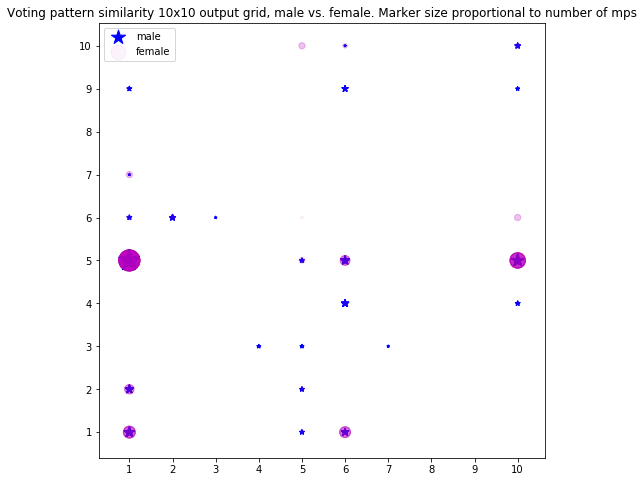

In [461]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

ax1.scatter(data_men[:,0],data_men[:,1],color='b',marker='*',s=data_men[:,2],label='male')
ax1.scatter(data_women[:,0],data_women[:,1],color='m',marker='o',alpha=0.05,s=data_women[:,2],label='female')
ax1.legend()

ax1.set_xticks(np.arange(10))
ax1.set_xticklabels(np.arange(1,11))
ax1.set_yticks(np.arange(10))
ax1.set_yticklabels(np.arange(1,11))

ax1.set_title('Voting pattern similarity 10x10 output grid, male vs. female. Marker size proportional to number of mps')

plt.show()

#### Voting pattern similiarity in 10x10 ouput lattice histogram for different political parties

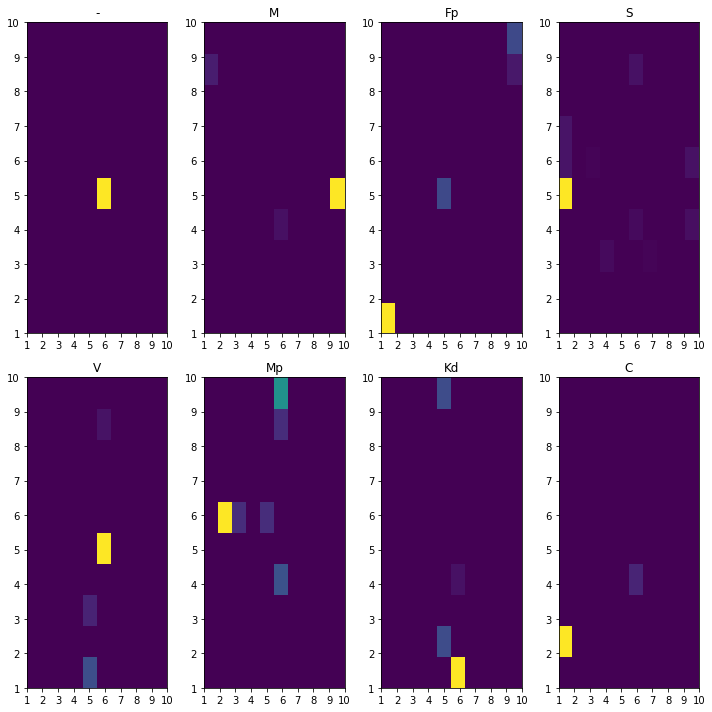

In [462]:
fig, axs = plt.subplots(2,4,figsize=(10,10))
axs = axs.ravel()
party_color = ['k','royalblue','navy','r','maroon','lime','darkviolet','darkgreen']
party_name = ['-','M','Fp','S','V','Mp','Kd','C']
party_number = [0,1,2,3,4,5,6,7]

for party,color in enumerate(party_color):
    d = mps[np.equal(attr[:,1],party_number[party])]
    axs[party].hist2d(d[:,0],d[:,1],range=[[0,9],[0,9]])
    axs[party].set_title(party_name[party])
    
    axs[party].set_xticks(np.arange(10))
    axs[party].set_xticklabels(np.arange(1,11))
    axs[party].set_yticks(np.arange(10))
    axs[party].set_yticklabels(np.arange(1,11))

plt.tight_layout()
plt.show()
    
    

#### Voting pattern similiarity in 10x10 ouput lattice histogram for different political parties

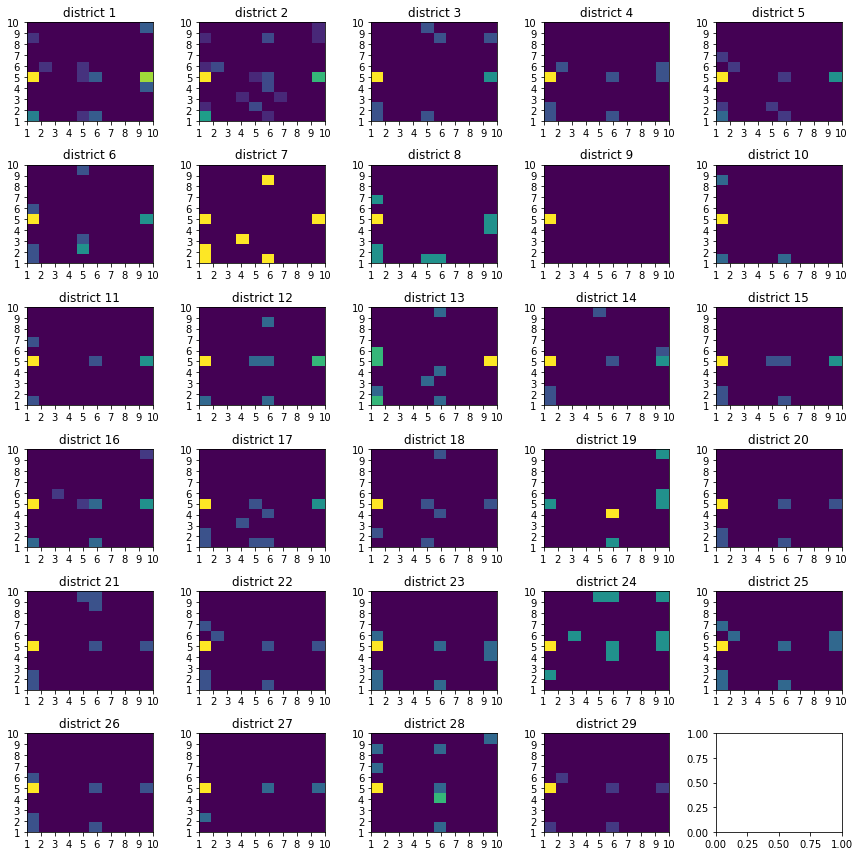

In [476]:
fig, axs = plt.subplots(6,5,figsize=(12,12))
axs = axs.ravel()

for i in range(29):
    d = mps[np.equal(attr[:,2],i+1)]
    
    axs[i].hist2d(d[:,0],d[:,1],range=[[0,9],[0,9]])
    axs[i].set_title('district '+str(i+1))
    
    axs[i].set_xticks(np.arange(10))
    axs[i].set_xticklabels(np.arange(1,11))
    axs[i].set_yticks(np.arange(10))
    axs[i].set_yticklabels(np.arange(1,11))

plt.tight_layout()
plt.show()
    
    

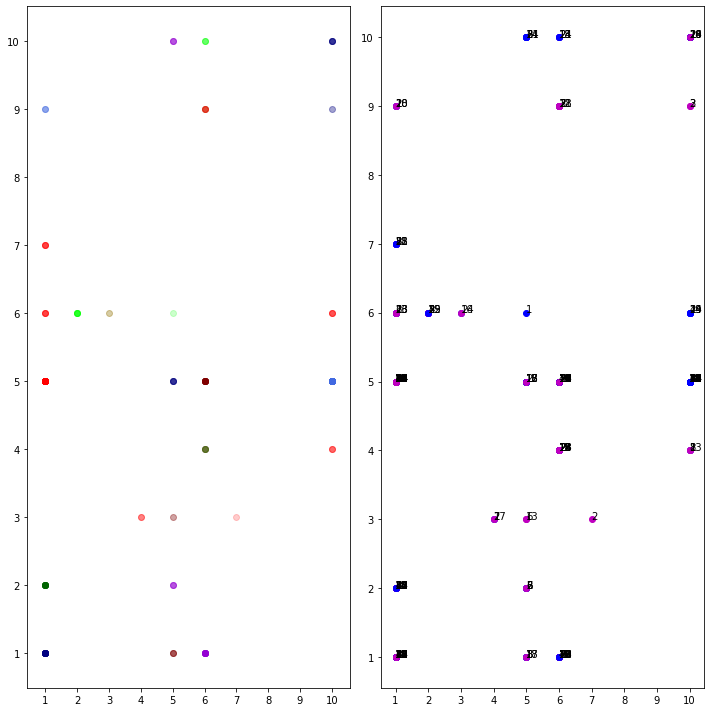

In [463]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
party_color = ['k','royalblue','navy','r','maroon','lime','darkviolet','darkgreen']


for i in range(mps.shape[0]):
    if attr[i,0] == 0:
        c = 'b'
    else:
        c='m'
    
    ax1.scatter(mps[i,0],mps[i,1],color=party_color[int(attr[i,1])],marker='o',alpha=0.2)
            
    ax2.plot(mps[i,0],mps[i,1],color=c,marker='o')
    ax2.annotate(int(attr[i,2]),(mps[i,0],mps[i,1]))

ax1.set_xticks(np.arange(10))
ax1.set_xticklabels(np.arange(1,11))
ax1.set_yticks(np.arange(10))
ax1.set_yticklabels(np.arange(1,11))

ax2.set_xticks(np.arange(10))
ax2.set_xticklabels(np.arange(1,11))
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(1,11))

plt.tight_layout()
plt.show()